# Basic Plotting in Python

The goal of this lesson is to teach plotting in `pandas.DataFrame` 

### Learning Objectives

- Obtain and interpret preliminary information about a `pandas.DataFrame` using methods such as `info()` (structure), `describe()` (summary statistics), `nunique()` (unique value counts), `unique()` (distinct values), and `value_counts()` (frequency counts)
- Create simple exploratory plots using the `plot()` method for `pandas.DataFrames` to visualize trends and distributions
- Understand the concept of performing operations on a `pandas.DataFrame` in-place
- Apply method chaining to enable concise and readable code

# Step 1: Importing data

In [1]:
import pandas as pd

# Read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<AxesSubplot:>

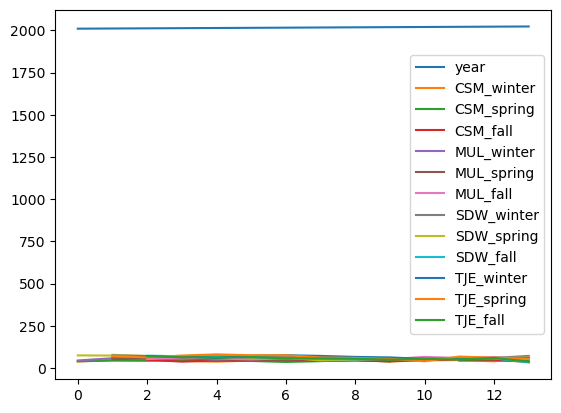

In [2]:
# Default plot(): one line plot per column with numeric data

df.plot()

<AxesSubplot:xlabel='year'>

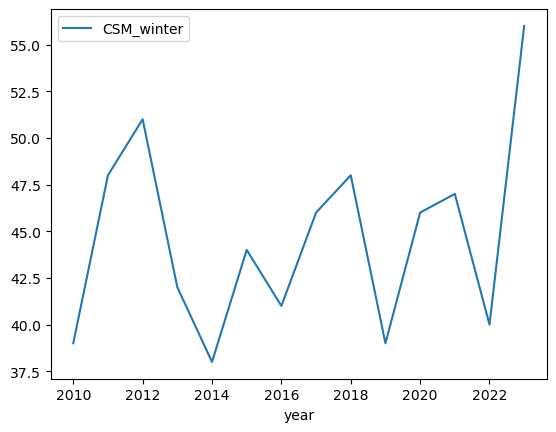

In [3]:
# Birds species registered during winter at CSM yearly
df.plot(x='year', y='CSM_winter')

- `title`: title to use for the plot.
- `xlabel`: name to use for the x-label on x-axis
- `ylabel`: bame to use for the y-label on y-axis
- `color`: change the color of our plot
- `legend`: boolean value True or False. True (default) includes the legend, False removes the legend

<AxesSubplot:title={'center':'Bird species registered during winter at Carpinteria Salt Marsh'}, xlabel='Year', ylabel='Number of bird species'>

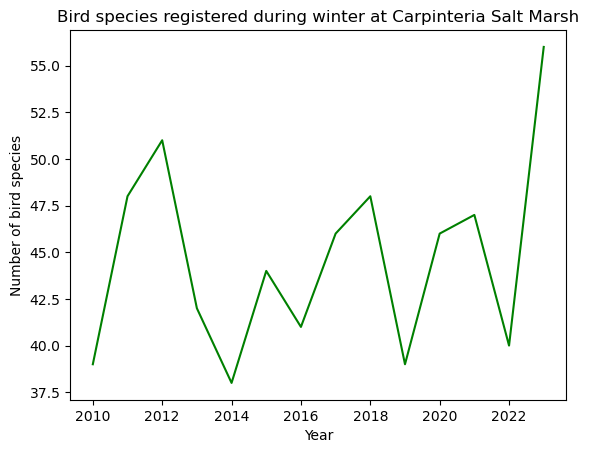

In [4]:
df.plot(x='year', 
        y='CSM_winter',
        title='Bird species registered during winter at Carpinteria Salt Marsh',
        xlabel='Year',
        ylabel='Number of bird species',
        color='green',
        legend=False
        )

# Check-in

1. Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

2. Use the `isna()` method for `panda.Series` and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


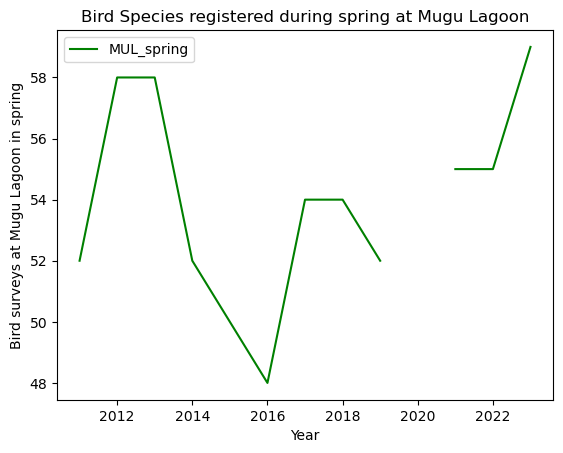

In [15]:
df.plot(x = 'year',
       y = 'MUL_spring',
       xlabel = 'Year',
       ylabel = 'Bird surveys at Mugu Lagoon in spring',
       title = 'Bird Species registered during spring at Mugu Lagoon',
       color = 'green')

df[df['MUL_spring'].isna() == True]

# Multiple Line Plots

We can plot multiple line plots by updating these parameters in the `plot()` method:

- `y`: a list of column names that will be plotted against the x-axis
- `color`: a dictionary '{'column_1': 'color_1', 'column_2':'color_2'}' specifying the color of each column's line plot

Example
Let’s say we want to compare the bird surveys at the Tijuana Estuary during spring and fall across years.

<AxesSubplot:title={'center':'Seasonal bird surveys at Tijuana Estuary'}, xlabel='Year', ylabel='Number of bird species'>

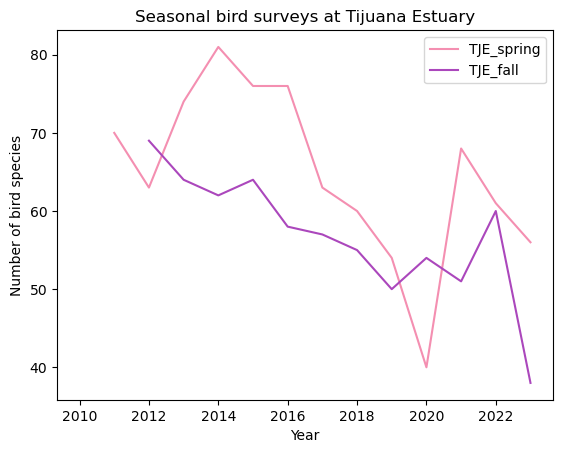

In [16]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 }
        )

array([<AxesSubplot:xlabel='Year', ylabel='Number of bird species'>,
       <AxesSubplot:xlabel='Year', ylabel='Number of bird species'>],
      dtype=object)

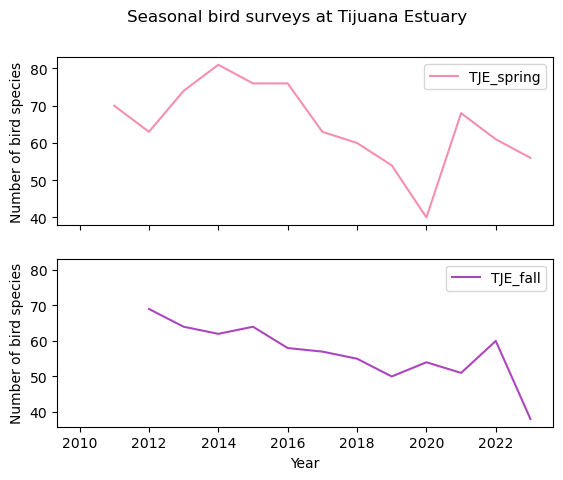

In [17]:
# We can also create separate plots for each column by setting the subset to True.
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 },
        subplots=True
        )

## Updating the index

`df.set_index('column_name')`

`df = df.set_index('column_name')`

`df.set_index('column_name', inplace=True)`
- Avoid using inplace = True, bad practice

In [19]:
# Update index to be the year column
df = df.set_index('year')
df.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
year,,,,,,,,,,,,
2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<AxesSubplot:xlabel='year'>

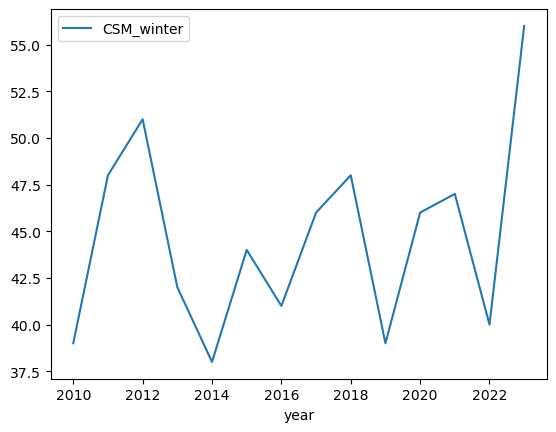

In [20]:
# Simple plot of Carpinteria Salt Marsh winter surveys
df.plot(y='CSM_winter')

In [21]:
# If needed, we can reset the index to be the numbering of the rows:

df = df.reset_index()
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


# Check-in 2

1. Without running the code, give a step-by-step breakdown of what this code is doing:

`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`

2. Is this code modifying the data frame df? Why or why not?

3. Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

<AxesSubplot:xlabel='year'>

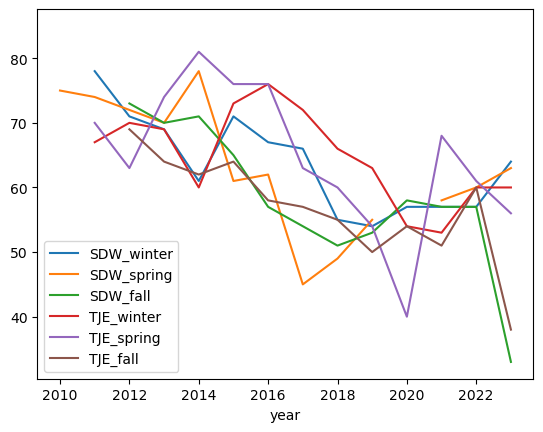

In [24]:
# 1. First, we are setting the index of the df to 'year', then we are using the loc function to find the SWD_winter to TJE_fall columns. We use the initial ':' in the brackets because we want all the rows for this. Then we are plotting it. 

# 2. This is not modifying the data frame beacuse we are not reassigning the df

df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

# 3. Run code. 
# - Yes, we have three seasons for two sites. 

# Method Chaining
Chaining methods can result in lines of code that are too long and hard to read. We can break up chains of methods by using parenthesis:

<AxesSubplot:xlabel='year'>

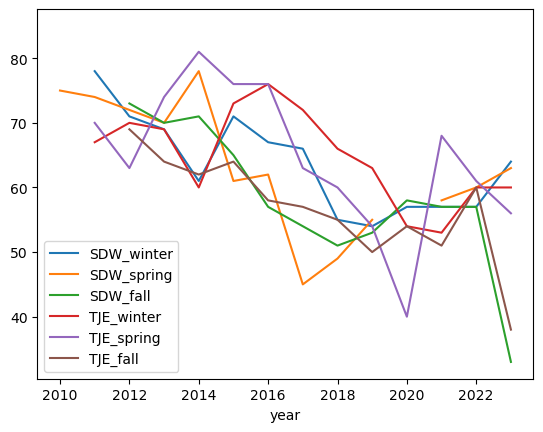

In [25]:
(df.set_index('year')
  .loc[:,'SDW_winter':'TJE_fall']
  .plot()
)

# Data Exploration

`palmerpenguin` data:

In [26]:
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [27]:
# Check column data types and NA values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [28]:
# Simple statistics about numeric columns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [29]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [30]:
# Get unique values in species column
penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

# Scatterplots 

- change argument `kind` to override `line` plot

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

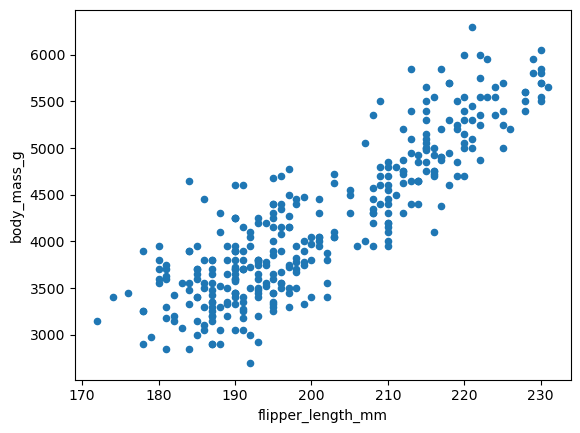

In [31]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g')

<AxesSubplot:title={'center':'Flipper length and body mass for Palmer penguins'}, xlabel='Flipper length (mm)', ylabel='Body mass (g)'>

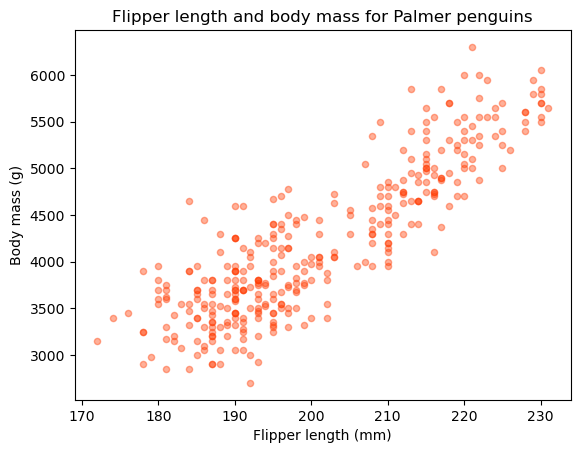

In [32]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g',
              title='Flipper length and body mass for Palmer penguins',
              xlabel='Flipper length (mm)',
              ylabel='Body mass (g)',
              color='#ff3b01',
              alpha=0.4  # Controls transparency
              )

# Bar Plots
- We can create bar plots of our data setting `kind='bar'` in the `plot()` method.
- For example, let’s say we want to get data about the 10 penguins with lowest body mass. We can first select this data using the `nsmallest()` method for series:

In [33]:
smallest = penguins.body_mass_g.nsmallest(10)
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

<AxesSubplot:>

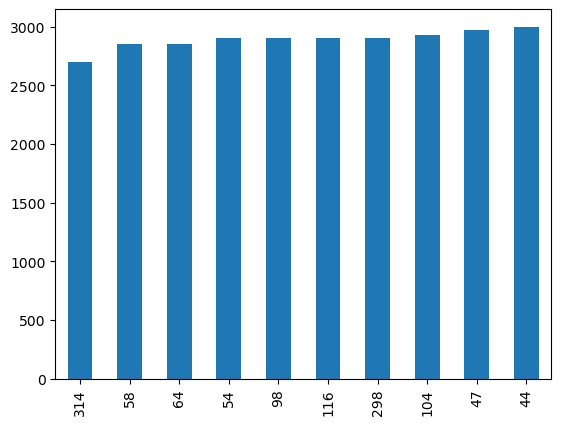

In [34]:
smallest.plot(kind='bar')

In [35]:
# If we wanted to look at other data for these smallest penguins we can use a different call to the nsmallest method:
penguins.nsmallest(10, 'body_mass_g')



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


# Histograms

We can create a histogram of our data setting `kind='hist'` in `plot()`.

<AxesSubplot:ylabel='Frequency'>

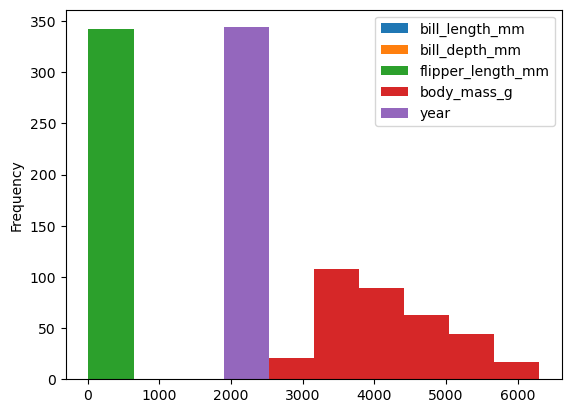

In [36]:
# Using plot without subsetting data - a mess again
penguins.plot(kind='hist')

<AxesSubplot:title={'center':'Penguin flipper lengths'}, ylabel='Frequency'>

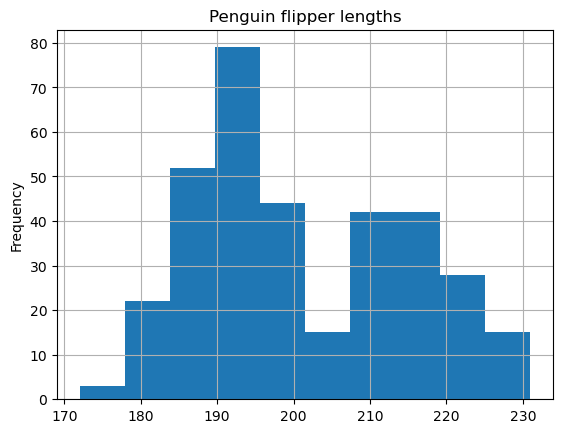

In [41]:
# Distribution of flipper length measurements
# First select data, then plot
penguins['flipper_length_mm'].plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

# Check-in 3

1. Select the `bill_length_mm` and `bill_depth_mm` columns in the `penguins` dataframe and then update the kind parameter to `box` to make boxplots of the bill length and bill depth.

2. Create a simple histogram of the flipper length of female gentoo penguins.

<AxesSubplot:title={'center':'Penguin bill length and depth boxplots'}, ylabel='Frequency'>

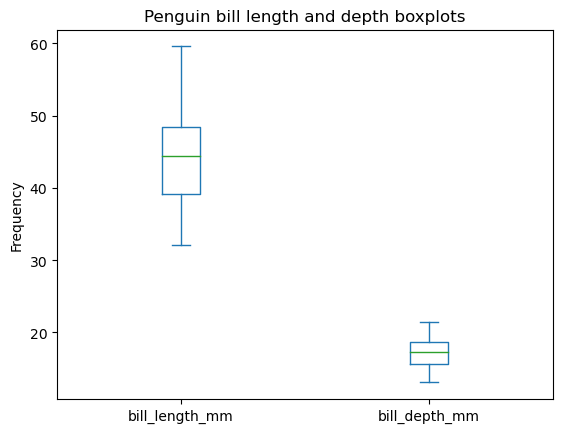

In [44]:
(penguins[['bill_length_mm', 'bill_depth_mm']]
    .plot(kind = "box",
      ylabel = 'Frequency',
      title = 'Penguin bill length and depth boxplots')
)

In [61]:
# 2. Create a simple histogram of the flipper length of female gentoo penguins.

penguins_female = penguins[penguins['sex'] == 'female']
penguins_female_gentoo = penguins_female[penguins_female['species'] == 'Gentoo']

<AxesSubplot:title={'center':'Flipper length of female Gentoo penguins'}, ylabel='Frequency'>

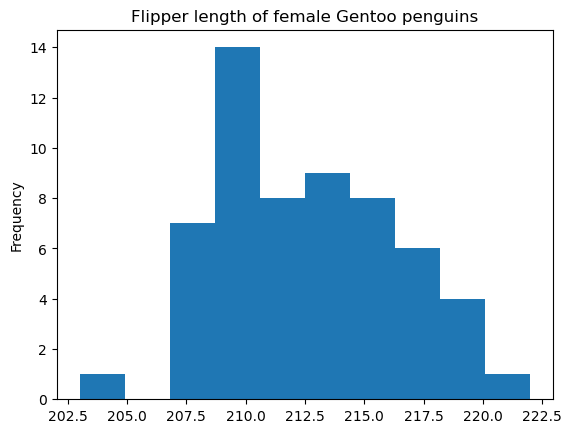

In [63]:
(penguins_female_gentoo['flipper_length_mm']
 .plot(kind = 'hist',
      xlabel = 'Flipper Length (mm)',
      ylabel = 'Frequency',
      title = 'Flipper length of female Gentoo penguins')
)